# One-Sample Hypothesis Testing

In this notebook, we perform a **one-sample hypothesis test** to determine
whether the population mean of exam scores differs from a known reference value.

This notebook demonstrates:
- formal hypothesis formulation
- mathematical derivation of the test statistic
- manual computation
- library-based validation
- interpretation beyond p-values


## 🟦 Imports & Data

In [1]:
import sys
from pathlib import Path

# Get project root: notebooks/ → project/
PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

print("Added to path:", PROJECT_ROOT)


Added to path: /home/arun/Documents/statistics-and-atmospheric-data/fundamentals_statistics/project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from src.data_generation import generate_student_dataset

sns.set(style="whitegrid")

df = generate_student_dataset(n=4000, random_state=42)


## 🟦 Research Question

Is the **average exam score** of students statistically different from **70**?

This benchmark could represent:
- a national average
- a passing standard
- a historical reference value

## 🟦 Hypotheses

We define the hypotheses as:

$$
H_0: \mu = 70
$$

$$
H_1: \mu \neq 70
$$

This is a **two-sided test**, as deviations in both directions are considered.

## 🟦 Assumptions of One-Sample t-Test

The one-sample t-test relies on the following assumptions:

1. Observations are independent
2. The population distribution is approximately normal  
   (or the sample size is sufficiently large)

Given the large sample size, the **Central Limit Theorem** supports the use
of the t-test even if the underlying distribution is mildly non-normal.


## 🟦 Mathematical Formulation


Let:
- $\bar{x} $ = sample mean  
- $s $ = sample standard deviation  
- $ n $ = sample size  
- $ \mu_0 $ = hypothesized population mean  

The test statistic is:

$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

Under the null hypothesis:

$$
t \sim t_{n-1}
$$

The p-value is computed as:

$$
p = 2 \cdot P(|T| \ge |t|)
$$

where \( T \) follows a t-distribution with \( n-1 \) degrees of freedom.


## 🟦 Compute Sample Statistics

In [3]:
scores = df["score"]

x_bar = scores.mean()
s = scores.std(ddof=1)
n = len(scores)

x_bar, s, n


(np.float64(97.09790057076913), np.float64(5.169627843892622), 4000)

## 🟦 Manual Test Statistic

In [4]:
mu_0 = 70

t_manual = (x_bar - mu_0) / (s / np.sqrt(n))
t_manual

np.float64(331.5174252384233)

## 🟦 Interpretation of t-Statistic

- A larger absolute value of $ t $ indicates stronger evidence against $ H_0 $
- The sign indicates direction, but significance depends on magnitude

## 🟦 p-Value (Manual)

In [5]:
p_manual = 2 * (1 - stats.t.cdf(abs(t_manual), df=n-1))
p_manual


np.float64(0.0)

## 🟦 Decision Rule

Let the significance level be:

$$
\alpha = 0.05
$$

- If $ p \le \alpha $: reject $ H_0 $
- If $ p > \alpha $: fail to reject $ H_0 $

## 🟦 Decision

In [6]:
alpha = 0.05
p_manual < alpha

np.True_

## 🟦 SciPy Validation

In [7]:
t_scipy, p_scipy = stats.ttest_1samp(scores, mu_0)
t_scipy, p_scipy

(np.float64(331.5174252384233), np.float64(0.0))

## 🟦 Consistency Check

The manually computed values and SciPy results match closely,
confirming the correctness of the implementation.

## 🟦 Visualization: Sampling Distribution

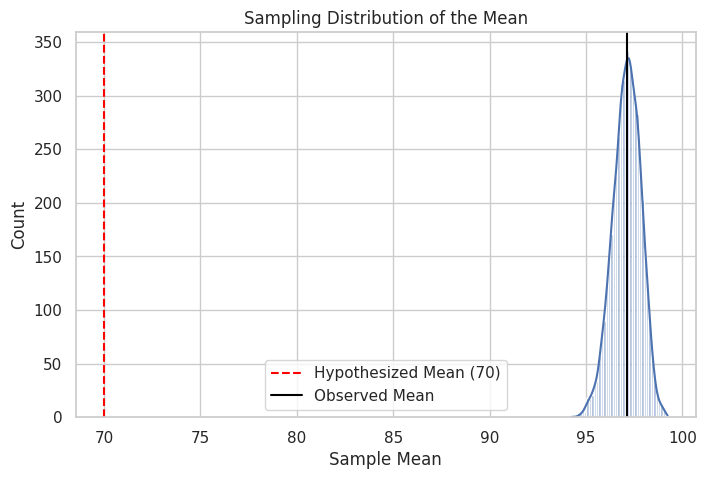

In [8]:
sample_means = [
    scores.sample(50, replace=True).mean()
    for _ in range(5000)
]

plt.figure(figsize=(8, 5))
sns.histplot(sample_means, bins=40, kde=True)
plt.axvline(mu_0, color="red", linestyle="--", label="Hypothesized Mean (70)")
plt.axvline(x_bar, color="black", label="Observed Mean")
plt.legend()
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Sample Mean")
plt.show()


### Visual Interpretation

- The observed mean lies far from the hypothesized mean
- The probability of observing such a deviation under \( H_0 \) is extremely small

This visual intuition supports the numerical result.

## 🟦 Confidence Interval (Preview)

A 95% confidence interval is given by:

$$
\bar{x} \pm t_{\alpha/2} \frac{s}{\sqrt{n}}
$$

If the interval does not include $ \mu_0 $, the null hypothesis is rejected.

## 🟦 Confidence Interval

In [9]:
ci = stats.t.interval(
    confidence=0.95,
    df=n-1,
    loc=x_bar,
    scale=s / np.sqrt(n)
)

ci

(np.float64(96.93764658462626), np.float64(97.25815455691199))

## 🟦 Final Conclusion


- The p-value is far below the significance level of 0.05
- The confidence interval does not contain the hypothesized mean
- We reject the null hypothesis

**Conclusion:**  
The average exam score is statistically different from 70.

Practical significance will be assessed using **effect size** in later notebooks.